# **Actividad I Aplicando el Algoritmo KNN**


Curso: APLICACION ESTADISTICA AL ANALISIS DE DATOS

Profesor: Carlos Ramírez

![Logo AIEP](https://upload.wikimedia.org/wikipedia/commons/1/1c/Logo_aiep.jpg)


# Integrantes:
1) Marjorie González






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statistics as stat
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Cargar los Datos

• Carga el dataset desde la URL proporcionada utilizando librerías como pandas.

In [ ]:
estrellas=pd.read_csv('https://raw.githubusercontent.com/cjramirezt/estrellas/main/estrellas.csv')

In [ ]:
estrellas.head(
               )

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),Color,Clase espectral,Tipo
0,3068,0.002400,0.1700,16.12,Red,M,Enana Roja
1,3042,0.000500,0.1542,16.60,Red,M,Enana Roja
2,2600,0.000300,0.1020,18.70,Red,M,Enana Roja
3,2800,0.000200,0.1600,16.65,Red,M,Enana Roja
4,1939,0.000138,0.1030,20.06,Red,M,Enana Roja


In [ ]:
estrellas.columns

Index(['Temperatura (K)', 'Luminosidad (L/Lo)', 'Radio (R/Ro)',
       'Magnitud absoluta (m)', 'Color', 'Clase espectral', 'Tipo'],
      dtype='object')

### 2. Identificar Registros Nulos

• Verifica si hay valores nulos en el dataset y maneja estos valores de manera adecuada(eliminación o imputación).

In [ ]:
estrellas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperatura (K)        240 non-null    int64  
 1   Luminosidad (L/Lo)     240 non-null    float64
 2   Radio (R/Ro)           240 non-null    float64
 3   Magnitud absoluta (m)  240 non-null    float64
 4   Color                  240 non-null    object 
 5   Clase espectral        240 non-null    object 
 6   Tipo                   240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [ ]:
estrellas.isnull()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),Color,Clase espectral,Tipo
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False


In [ ]:
estrellas.dropna(inplace=True)


### 3. Identificar la Cantidad de Tipos de Estrellas

• Analiza el dataset para determinar la cantidad de diferentes tipos de estrellas presentes.

In [ ]:
len(estrellas["Tipo"].unique())

6

In [ ]:
estrellas.value_counts('Tipo')

Tipo
Enana Blanca           40
Enana Marron           40
Enana Roja             40
Hyper Gigante          40
Secuencia Principal    40
Super Gigante          40
Name: count, dtype: int64

### 4. Visualización de Datos

• Grafica las columnas de Temperatura, Luminosidad, Radio y Magnitud Absoluta para identificar posibles relaciones entre estas características.

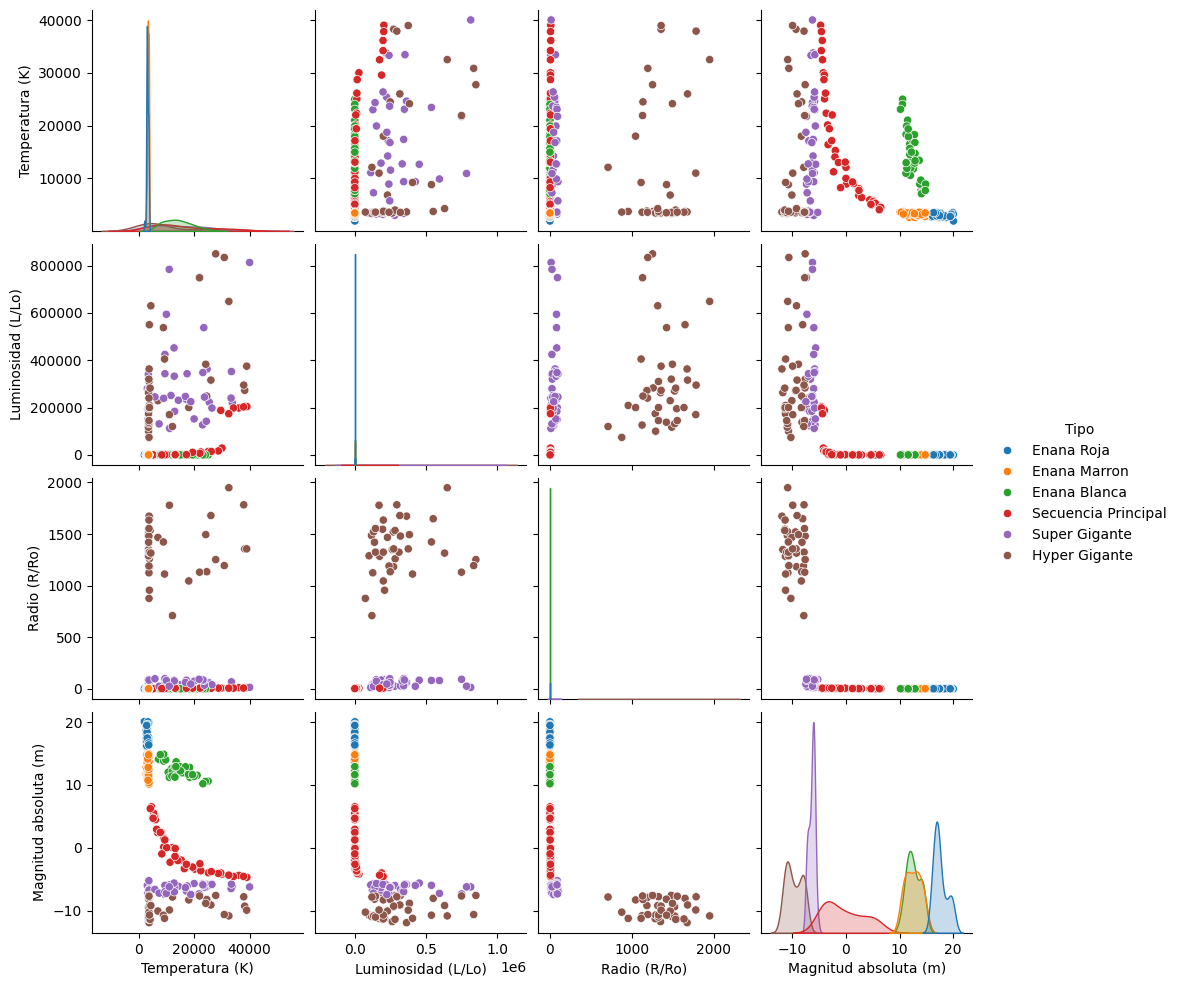

In [ ]:
sns.pairplot(estrellas, hue="Tipo", vars=["Temperatura (K)","Luminosidad (L/Lo)","Radio (R/Ro)", "Magnitud absoluta (m)"])
plt.show()

### 5. Normalización de Datos

• Normaliza los datos para asegurar que todas las características contribuyan de manera
equitativa en la clasificación.

In [ ]:
estrellas['Tipo'].unique()

array(['Enana Roja', 'Enana Marron', 'Enana Blanca',
       'Secuencia Principal', 'Super Gigante', 'Hyper Gigante'],
      dtype=object)

In [ ]:
nombre_estrellas ={ 'Enana Roja': 0, 'Enana Marron': 1, 'Enana Blanca': 2,'Secuencia Principal': 3, 'Super Gigante': 4, 'Hyper Gigante': 5}
estrellas['Clase'] = estrellas['Tipo'].map(nombre_estrellas)
estrellas.drop('Tipo', axis=1, inplace=True)

In [ ]:
estrellas2 = estrellas.copy()
estrellas2= estrellas2[['Temperatura (K)', 'Radio (R/Ro)', 'Magnitud absoluta (m)', 'Clase']]

In [ ]:
estrellas2

,Temperatura (K),Radio (R/Ro),Magnitud absoluta (m),Clase
0,3068,0.1700,16.12,0
1,3042,0.1542,16.60,0
2,2600,0.1020,18.70,0
3,2800,0.1600,16.65,0
4,1939,0.1030,20.06,0
...,...,...,...,...
235,38940,1356.0000,-9.93,5
236,30839,1194.0000,-10.63,5
237,8829,1423.0000,-10.73,5
238,9235,1112.0000,-11.23,5


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(estrellas2)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns = {0: 'Temperatura (K)', 1: 'Radio (R/Ro)', 2 :'Magnitud absoluta (m)'})

In [ ]:
x = df_escalado['Temperatura (K)'].values
y = df_escalado['Radio (R/Ro)'].values
z = df_escalado['Magnitud absoluta (m)'].values

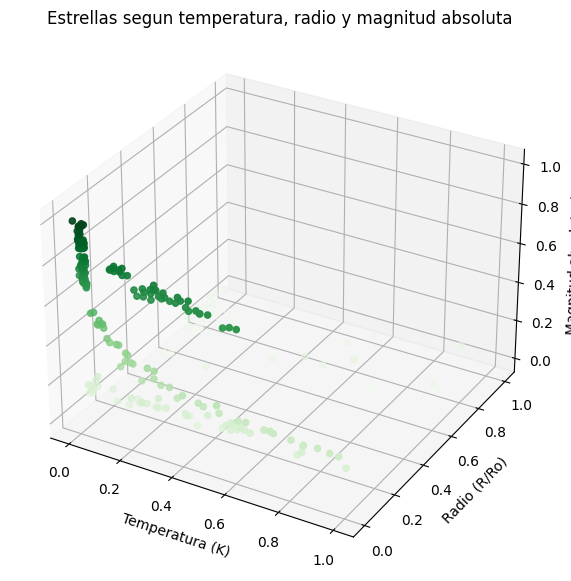

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens');
ax.set_xlabel("Temperatura (K)")
ax.set_ylabel("Radio (R/Ro)")
ax.set_zlabel("Magnitud absoluta (m)")
plt.title('Estrellas segun temperatura, radio y magnitud absoluta')
plt.show()

## 6. División de Datos

• Divide el dataset en conjuntos de entrenamiento y prueba. Una división común es el 70% para
entrenamiento y el 30% para prueba.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(estrellas2.drop('Clase', axis=1), estrellas2['Clase'], test_size=0.2)


In [ ]:
X_train

,Temperatura (K),Radio (R/Ro),Magnitud absoluta (m)
103,17120,83.00000,-6.890
30,39000,10.60000,-4.700
189,3523,0.12900,16.350
138,3324,0.34000,12.230
118,6850,1467.00000,-10.070
...,...,...,...
140,13420,0.00981,13.670
82,8930,0.00950,13.780
228,23095,86.00000,-5.905
205,19920,0.01420,11.340


In [ ]:
y_train

103    4
30     3
189    0
138    1
118    5
      ..
140    2
82     2
228    4
205    2
231    5
Name: Clase, Length: 192, dtype: int64

## 7. Implementación del Método del Codo

• Utilizar el método del codo para determinar el número  ́optimo de vecinos m ́as cercanos (k). lo que implica entrenar el modelo k-NN con diferentes valores de k y graficar el error cuadrático promedio para identificar el “codo” en la gráfica.


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_train

array([[ 6.02780407e-01, -2.89517533e-01, -1.07868636e+00],
       [ 2.77743449e+00, -4.31171975e-01, -8.69997307e-01],
       [-7.48625974e-01, -4.51659043e-01,  1.13589519e+00],
       [-7.68404592e-01, -4.51246210e-01,  7.43292955e-01],
       [-4.17955309e-01,  2.41835192e+00, -1.38171430e+00],
       [ 1.34919961e+00, -3.28648594e-01, -9.77677047e-01],
       [-2.47004439e-01, -4.51892459e-01,  9.31017812e-01],
       [-6.03814685e-01, -4.49700533e-01,  3.33690064e-02],
       [ 2.25563678e+00, -4.01041058e-01, -1.00340583e+00],
       [-7.43457691e-01, -3.63866550e-01, -1.06820426e+00],
       [ 2.77147109e+00,  2.20117453e+00, -1.36837345e+00],
       [-7.40972940e-01, -3.95171399e-01, -1.05105174e+00],
       [ 9.48973001e-02, -4.51893438e-01,  7.33763775e-01],
       [-9.06059798e-01, -4.51709913e-01,  1.48942779e+00],
       [-7.66317401e-01, -4.51377299e-01,  7.49963382e-01],
       [-7.78244206e-01, -4.51674695e-01,  1.44845231e+00],
       [-1.72461909e-01, -4.48174421e-01

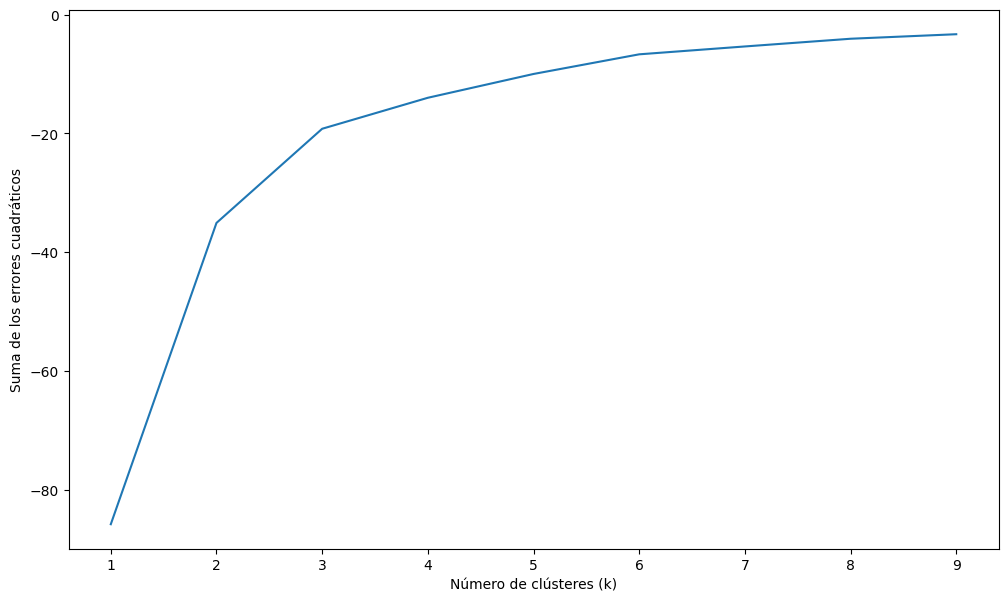

In [ ]:
df_escalado.columns = df_escalado.columns.astype(str)
#esto porque kmeans solo utilisa datos en cadena entonces hay que transformarlos
nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)


In [ ]:
kmeans = KMeans(n_clusters=6).fit(df_escalado)
centroids = kmeans.cluster_centers_
centroids


array([[3.15779275e-02, 1.13256839e-04, 8.43393918e-01, 1.00000000e-01],
       [7.14959957e-01, 7.17193826e-01, 9.34959350e-02, 1.00000000e+00],
       [1.84439736e-01, 1.35102657e-02, 2.98367852e-01, 6.98039216e-01],
       [3.15084995e-01, 1.19489866e-06, 7.66181989e-01, 4.00000000e-01],
       [7.18764524e-02, 6.95562915e-01, 6.22587393e-02, 1.00000000e+00],
       [6.71785491e-01, 1.55732030e-02, 2.12928339e-01, 7.03448276e-01]])

## 8. Implementación del Algoritmo k-NN

• Implementa el algoritmo k-NN utilizando la librería scikit-learn o cualquier otra, empleando el valor optimo de k determinado en el paso anterior.


In [ ]:

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

## 9. Evaluación de la Precisión del Modelo

• Evalúa la precisión del modelo con el porcentaje de clasificaciones correctas hechas por elalgoritmo knn


In [ ]:
X_test = scaler.transform(X_test)
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 1, 0, 1, 4, 5, 0, 1, 2, 0, 3, 1, 3, 5, 2, 1, 0, 2, 5, 5, 0,
       3, 5, 5, 0, 0, 5, 3, 3, 4, 1, 4, 2, 3, 1, 5, 4, 1, 3, 3, 4, 5, 3,
       0, 3, 3, 4])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 11  1  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      0.92      0.96        12
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         9

    accuracy                           0.98        48
   macro avg       0.97      0.99      0.98        48
weighted avg       0.98      0.98      0.98        48



In [ ]:
#accuracy = knn.score(X_test, y_test)
#print("Precisión del modelo:", accuracy)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9791666666666666


//El valor óptimo para la precisión del modelo es 1,0, lo que indica que el modelo clasifica correctamente todas las instancias en el conjunto de prueba.//

## 10. Visualización de Clasificaciones
• Gráfica las clasificaciones resultantes en un plano cartesiano. Puedes usar gáficos en 2D o 3D segùn lo estimes conveniente para ilustrar la clasificación de las estrellas.

In [ ]:
# devolvemos los datos a su escala original
X_train = scaler.inverse_transform(X_train)
#devolvemos las etiquetas originales a la columna de especies con un diccionario inverso
nombre_estrellas = { 0: 'Enana Roja', 1: 'Enana Marron',2: 'Enana Blanca', 3:'Secuencia Principal',4: 'Super Gigante',5: 'Hyper Gigante'}

In [ ]:
X_test = pd.DataFrame(X_test,columns=['Temperatura (K)', 'Radio (R/Ro)', 'Magnitud absoluta (m)'])
X_test['Clase'] = y_pred
X_test['Clase'] = X_test['Clase'].map(nombre_estrellas)

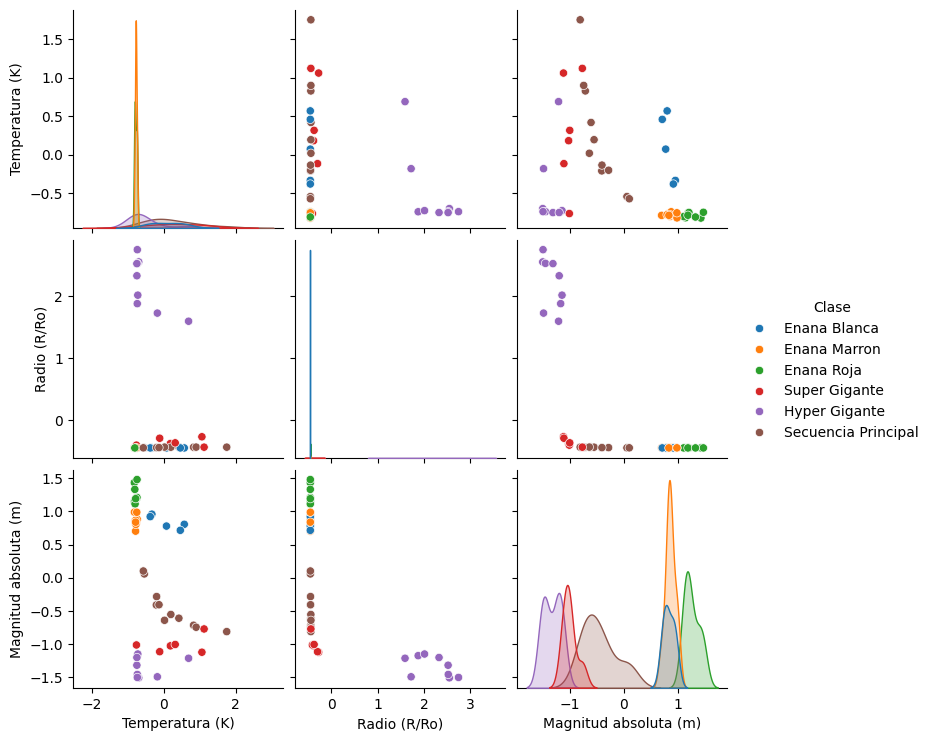

In [ ]:
sns.pairplot(X_test, hue='Clase')
plt.show()

In [ ]:
labels2 = kmeans.predict(df_escalado)


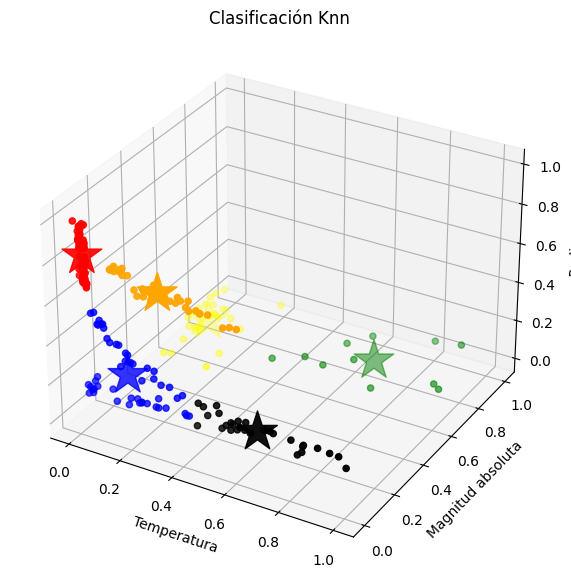

In [ ]:
colores=['red','green','blue','orange','yellow', 'black']
asignar=[]
for row in labels2:
     asignar.append(colores[row])
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=asignar)
ax.scatter3D(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker = '*',c=['red','green','blue','orange','yellow', 'black'],
            s=900)
ax.set_xlabel("Temperatura")
ax.set_ylabel("Magnitud absoluta")
ax.set_zlabel("Radio")
plt.title('Clasificación Knn')
plt.show()